<a href="https://colab.research.google.com/github/slatteryjim/fastbook/blob/master/2024_04_05_MNIST_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
torch.device("cuda")

device(type='cuda')

In [4]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is not available, using CPU instead


In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
path

Path('/root/.fastai/data/mnist_sample')

In [7]:
# "cd" into that folder, so we just display relative paths
Path.BASE_PATH = path

In [8]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [9]:
(path/'train/3').ls()

(#6131) [Path('train/3/17752.png'),Path('train/3/34316.png'),Path('train/3/52041.png'),Path('train/3/57868.png'),Path('train/3/37903.png'),Path('train/3/44729.png'),Path('train/3/36427.png'),Path('train/3/10000.png'),Path('train/3/12913.png'),Path('train/3/20397.png')...]

In [10]:
(path/'valid/3').ls()

(#1010) [Path('valid/3/9996.png'),Path('valid/3/4084.png'),Path('valid/3/2647.png'),Path('valid/3/8206.png'),Path('valid/3/437.png'),Path('valid/3/9579.png'),Path('valid/3/7804.png'),Path('valid/3/4509.png'),Path('valid/3/2025.png'),Path('valid/3/87.png')...]

In [11]:
train_threes = (path/'train/3').ls().sorted()
train_sevens = (path/'train/7').ls().sorted()
valid_threes = (path/'valid/3').ls().sorted()
valid_sevens = (path/'valid/7').ls().sorted()

print(f"Train: 3({len(train_threes)}), 7({len(train_sevens)})")
print(f"Valid: 3({len(valid_threes)}), 7({len(valid_sevens)})")

Train: 3(6131), 7(6265)
Valid: 3(1010), 7(1028)


In [12]:
im3 = Image.open(train_threes[0])
im3

In [13]:
tensor(im3)[3:-3, 5:-7]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,   0,   0,   0],
        [  0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254, 254,  66,   0,   0,   0],
        [  0,   0,   0,   0,   0,  18, 232, 254, 254, 254, 254, 254, 238,  70,   0,   0],
        [  0,   0,   0,   0,   0,   0, 104, 244, 254, 224, 254, 254, 254, 141,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 207, 254, 210, 254, 254, 254,  34,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  84, 206, 254, 254, 254, 254,  41,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  24, 209, 254, 254, 254, 171,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  91, 137, 253, 254, 254, 254, 112,   0,   0],
        [  0,   0,   0,   0,   0,  40, 214, 250, 254, 254, 254, 254, 254,  34,   0,   0],
        [  0,   0,   0,   0,   0,  81, 247, 254, 254, 254, 254, 254, 254, 146,   0,   0],
        [ 

In [14]:
matplotlib.rc('image', cmap='Greys')

df = pd.DataFrame(tensor(im3)[3:-3, 5:-7])
df.style.set_properties(**{'font-size':'8pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0
2,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0
3,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0
4,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0
5,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0
6,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0
7,0,0,0,0,0,0,0,0,24,209,254,254,254,171,0,0
8,0,0,0,0,0,0,0,91,137,253,254,254,254,112,0,0
9,0,0,0,0,0,40,214,250,254,254,254,254,254,34,0,0


In [15]:
tensor([[1,2,3],[10,20,30]]).shape

torch.Size([2, 3])

In [16]:
# multiplication is an "element-wise" operation
tensor([[1,2,3],[10,20,30]]) * tensor([4,5,6])

tensor([[  4,  10,  18],
        [ 40, 100, 180]])

# Baseline Model - pixel similarity

In [17]:
from torchvision.transforms.functional import to_tensor

# Load all the images into a tensor.
# `to_tensor` converts the image to a tensor, automatically scaling
# the image data to a range of [0, 1].
def load_images(path):
  images = [
      to_tensor(Image.open(img)).to(device) # move to GPU
      for img in path.ls().sorted()
  ]
  return torch.stack(images)

train_threes_tensor = load_images(path/"train/3")

In [18]:
train_threes_tensor.shape

torch.Size([6131, 1, 28, 28])

In [19]:
train_threes_tensor.dtype

torch.float32

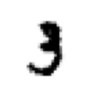

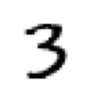

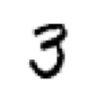

In [20]:
for i in range(3):
  show_image(train_threes_tensor[i])

In [21]:
train_threes_tensor = load_images(path/"train/3")
train_sevens_tensor = load_images(path/"train/7")
valid_threes_tensor = load_images(path/"valid/3")
valid_sevens_tensor = load_images(path/"valid/7")

In [22]:
print(train_threes_tensor.shape)
print(train_sevens_tensor.shape)
print(valid_threes_tensor.shape)
print(valid_sevens_tensor.shape)

torch.Size([6131, 1, 28, 28])
torch.Size([6265, 1, 28, 28])
torch.Size([1010, 1, 28, 28])
torch.Size([1028, 1, 28, 28])


<Axes: >

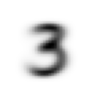

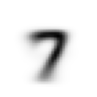

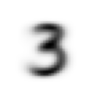

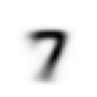

In [23]:
# Calculate the average 3, 7, etc.
train_threes_avg = train_threes_tensor.mean(dim=0)
train_sevens_avg = train_sevens_tensor.mean(dim=0)
valid_threes_avg = valid_threes_tensor.mean(dim=0)
valid_sevens_avg = valid_sevens_tensor.mean(dim=0)
show_image(train_threes_avg)
show_image(train_sevens_avg)
show_image(valid_threes_avg)
show_image(valid_sevens_avg)

<Axes: >

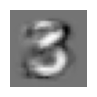

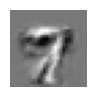

In [24]:
# is there a difference between training and validation averages?
show_image(train_threes_avg - valid_threes_avg)
show_image(train_sevens_avg - valid_sevens_avg)

mean distance: tensor(0.1114)
root mean squared distance: tensor(0.2021)


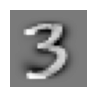

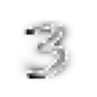

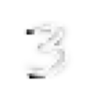

In [25]:
a_3 = train_threes_tensor[1]
dist = train_threes_avg - a_3
show_image(dist)
dist_abs = dist.abs()
show_image(dist_abs)
dist_abs_mean = dist_abs.mean()
print("mean distance:", dist_abs_mean)
dist_square = dist**2
dist_rms = dist_square.mean().sqrt()
show_image(dist_square)
print("root mean squared distance:", dist_rms)

In [26]:
# Is it a 3? or a 7?
a_3 = train_threes_tensor[1]
F.l1_loss(a_3, train_threes_avg), F.mse_loss(a_3, train_threes_avg).sqrt()

(tensor(0.1114), tensor(0.2021))

In [27]:
F.l1_loss(a_3, train_sevens_avg), F.mse_loss(a_3, train_sevens_avg).sqrt()

(tensor(0.1586), tensor(0.3021))

In [28]:
tensor([
    [1,2,3],
    [4,5,6],
    [6,7,8]
]).float().mean((-1,-2)) # averaging over the last two dimensions

tensor(4.6667)

In [29]:
# So how well does this "model" perform?
def mnist_dist(a, b):
  return (a-b).abs().mean((-1,-2)) # average over the "last two dimensions"

mnist_dist(a_3, train_threes_avg), mnist_dist(a_3, train_sevens_avg)

(tensor([0.1114]), tensor([0.1586]))

In [30]:
print(mnist_dist(valid_threes_tensor, train_threes_avg).mean())
print(mnist_dist(valid_threes_tensor, train_sevens_avg).mean())

tensor(0.1296)
tensor(0.1596)


In [31]:
def is_3(x): return mnist_dist(x, train_threes_avg) < mnist_dist(x, train_sevens_avg)

In [32]:
is_3(a_3)

tensor([True])

In [33]:
is_3(valid_threes_tensor).float().mean()

tensor(0.9168)

In [34]:
def is_7(x): return mnist_dist(x, train_sevens_avg) < mnist_dist(x, train_threes_avg)

In [35]:
is_7(valid_sevens_tensor).float().mean()

tensor(0.9854)

In [36]:
accuracy_3s = is_3(valid_threes_tensor).float().mean()
accuracy_7s = is_7(valid_sevens_tensor).float().mean()

accuracy_3s, accuracy_7s, tensor([accuracy_3s, accuracy_7s]).mean()

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [37]:
# nice, 95% accuracy overall with this baseline "model"

# how about all 10 digits -- how well does a baseline model perform?

In [38]:
path = untar_data(URLs.MNIST)

In [39]:
# "cd" into that folder, so we just display relative paths
Path.BASE_PATH = path

In [44]:
path.ls().sorted()

(#2) [Path('testing'),Path('training')]

In [42]:
(path/"testing/").ls().sorted()

(#10) [Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/7'),Path('testing/8'),Path('testing/9')]

In [45]:
# build our "model" from the training data
# calculate the ideal "average" number, for each number
model_number = [
    load_images(path/f"training/{n}").mean(dim=0)
    for n in range(10)
]

In [56]:
# convert to a single tensor (stack)
# and get rid of the channel dimension as these images are grayscale (single channel)
model_number = torch.stack(model_number).squeeze(1)

In [58]:
model_number.shape

torch.Size([10, 28, 28])

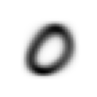

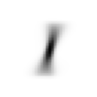

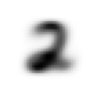

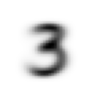

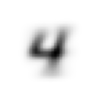

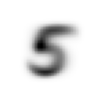

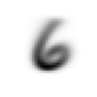

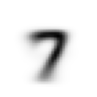

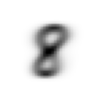

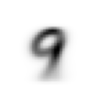

In [59]:
for n in model_number:
  show_image(n)

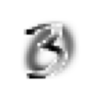

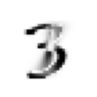

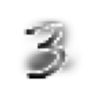

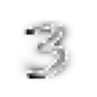

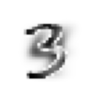

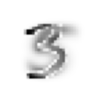

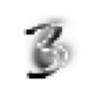

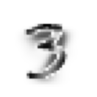

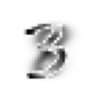

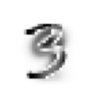

In [62]:
for d in (model_number - a_3):
  show_image(d.abs())

In [63]:
(model_number - a_3).abs().mean((-1,-2))

tensor([0.1879, 0.1353, 0.1734, 0.1114, 0.1704, 0.1443, 0.1723, 0.1586, 0.1550, 0.1601])

In [65]:
(model_number - a_3).abs().mean((-1,-2)).argmin()

tensor(3)

In [78]:
dist = model_number - valid_threes_tensor
dist.shape

torch.Size([1010, 10, 28, 28])

In [83]:
loss = dist.abs().mean((-1,-2))
loss.shape

torch.Size([1010, 10])

In [86]:
loss.argmin(-1)

tensor([1, 3, 3,  ..., 1, 8, 3])

In [87]:
def baseline_classify_digit(x):
  # check mnist_loss against each digit model
  dist = (model_number - x)
  loss = dist.abs().mean((-1, -2))
  # the index with the lowest loss corresponds to the best-matching digit
  return loss.argmin(-1)

In [88]:
baseline_classify_digit(a_3)

tensor(3)

In [92]:
valid_threes_tensor.shape

torch.Size([1010, 1, 28, 28])

In [89]:
baseline_classify_digit(valid_threes_tensor)

tensor([1, 3, 3,  ..., 1, 8, 3])

In [94]:
# now let's load all the validation data into a tensor
validation_digits = [
    load_images(path/f"testing/{n}")
    for n in range(10)
]

In [95]:
validation_digits[0].shape

torch.Size([980, 1, 28, 28])

In [96]:
for i, x in enumerate(validation_digits):
  print(f"{i}: {x.shape}")

0: torch.Size([980, 1, 28, 28])
1: torch.Size([1135, 1, 28, 28])
2: torch.Size([1032, 1, 28, 28])
3: torch.Size([1010, 1, 28, 28])
4: torch.Size([982, 1, 28, 28])
5: torch.Size([892, 1, 28, 28])
6: torch.Size([958, 1, 28, 28])
7: torch.Size([1028, 1, 28, 28])
8: torch.Size([974, 1, 28, 28])
9: torch.Size([1009, 1, 28, 28])


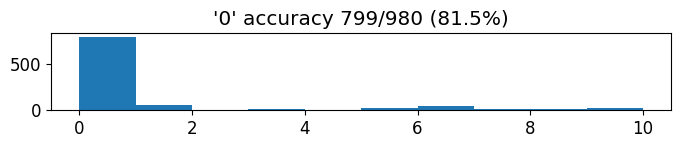

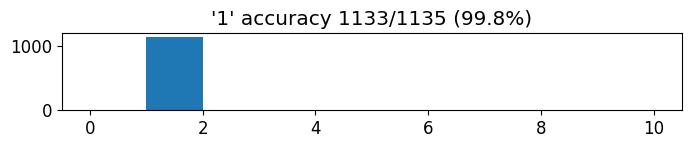

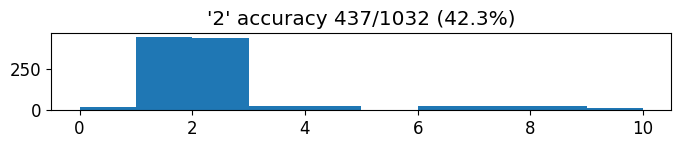

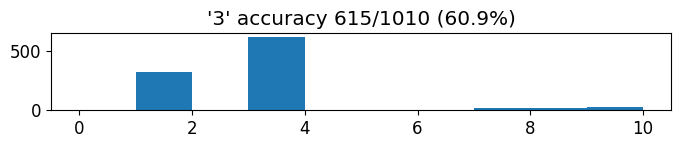

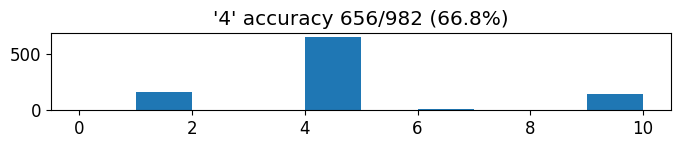

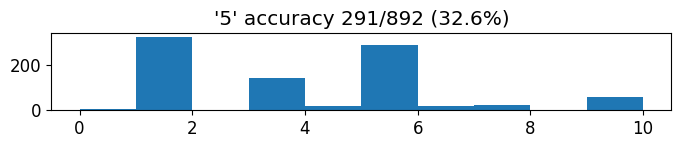

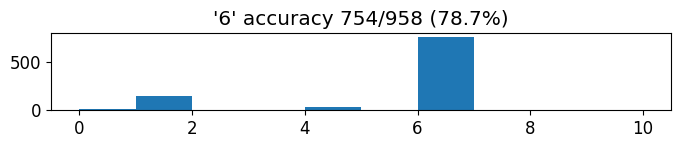

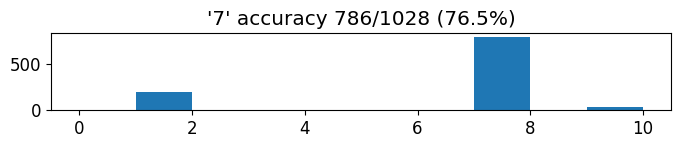

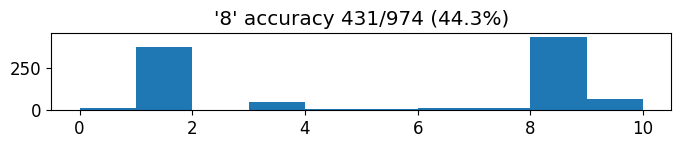

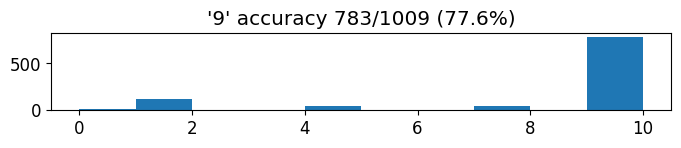

In [115]:
for i, x in enumerate(validation_digits):
  res = baseline_classify_digit(x)
  accuracy = (res == i).sum() / res.size(0)
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 1))
  plt.hist(res.numpy(), bins=range(11))
  plt.title(f"'{i}' accuracy {(res == i).sum()}/{res.size(0)} ({accuracy*100:.1f}%)")
  plt.show()

In [116]:
total_correct = 0
total_samples = 0
for i, x in enumerate(validation_digits):
  res = baseline_classify_digit(x)
  correct = (res == i).sum()
  samples = res.size(0)
  total_correct += correct
  total_samples += samples
  accuracy = correct / samples
  print(f"'{i}' accuracy {correct}/{samples} ({accuracy*100:.1f}%)")

print(f"Total correct: {total_correct}/{total_samples}")
print(f"Accuracy: {total_correct/total_samples*100:0.1f}")

'0' accuracy 799/980 (81.5%)
'1' accuracy 1133/1135 (99.8%)
'2' accuracy 437/1032 (42.3%)
'3' accuracy 615/1010 (60.9%)
'4' accuracy 656/982 (66.8%)
'5' accuracy 291/892 (32.6%)
'6' accuracy 754/958 (78.7%)
'7' accuracy 786/1028 (76.5%)
'8' accuracy 431/974 (44.3%)
'9' accuracy 783/1009 (77.6%)
Total correct: 6685/10000
Accuracy: 66.8


In [ ]:
# Only 66.8% accuracy with the baseline model, using L1 error (abs mean).

# how about using RMSE? Would that be more accurate?

In [117]:
def baseline_rmse_classify_digit(x):
  # check rmse against each digit model
  dist = (model_number - x)
  loss = (dist**2).mean((-1, -2)).sqrt()
  # the index with the lowest loss corresponds to the best-matching digit
  return loss.argmin(-1)

In [118]:
total_correct = 0
total_samples = 0
for i, x in enumerate(validation_digits):
  res = baseline_rmse_classify_digit(x)
  correct = (res == i).sum()
  samples = res.size(0)
  total_correct += correct
  total_samples += samples
  accuracy = correct / samples
  print(f"'{i}' accuracy {correct}/{samples} ({accuracy*100:.1f}%)")

print(f"Total correct: {total_correct}/{total_samples}")
print(f"Accuracy: {total_correct/total_samples*100:0.1f}")

'0' accuracy 878/980 (89.6%)
'1' accuracy 1092/1135 (96.2%)
'2' accuracy 781/1032 (75.7%)
'3' accuracy 814/1010 (80.6%)
'4' accuracy 811/982 (82.6%)
'5' accuracy 612/892 (68.6%)
'6' accuracy 827/958 (86.3%)
'7' accuracy 856/1028 (83.3%)
'8' accuracy 718/974 (73.7%)
'9' accuracy 814/1009 (80.7%)
Total correct: 8203/10000
Accuracy: 82.0


In [120]:
# Wow, made a big difference.. 82% accurate with RMSE

In [149]:
rows = []

for i, x in enumerate(validation_digits):
  rmse_correct = (baseline_rmse_classify_digit(x) == i).sum().item()
  l1_correct   = (baseline_classify_digit(x)      == i).sum().item()
  samples = x.size(0)
  rows.append({
      'rmse_correct': rmse_correct,
      'l1_correct':   l1_correct,
      'samples':      x.size(0),
  })

df = pd.DataFrame(rows)
df['rmse-l1']   = df['rmse_correct'] - df['l1_correct']
df['rmse-l1(%)'] = (df['rmse-l1']      / df['samples'] * 100).round(1).astype(str) + '%'
df['rmse(%)']    = (df['rmse_correct'] / df['samples'] * 100).round(1).astype(str) + '%'
df['l1(%)']      = (df['l1_correct']   / df['samples'] * 100).round(1).astype(str) + '%'
df

,rmse_correct,l1_correct,samples,rmse-l1,rmse-l1(%),rmse(%),l1(%)
0,878,799,980,79,8.1%,89.6%,81.5%
1,1092,1133,1135,-41,-3.6%,96.2%,99.8%
2,781,437,1032,344,33.3%,75.7%,42.3%
3,814,615,1010,199,19.7%,80.6%,60.9%
4,811,656,982,155,15.8%,82.6%,66.8%
5,612,291,892,321,36.0%,68.6%,32.6%
6,827,754,958,73,7.6%,86.3%,78.7%
7,856,786,1028,70,6.8%,83.3%,76.5%
8,718,431,974,287,29.5%,73.7%,44.3%
9,814,783,1009,31,3.1%,80.7%,77.6%


In [155]:
totals_df = df[["rmse_correct", "l1_correct", "samples", "rmse-l1"]].sum()
totals_df['rmse(%)']    = f"{totals_df['rmse_correct']/totals_df['samples']*100:.1f}%"
totals_df['l1(%)']      = f"{totals_df['l1_correct']  /totals_df['samples']*100:.1f}%"
totals_df['rmse-l1(%)'] = f"{totals_df['rmse-l1']     /totals_df['samples']*100:.1f}%"
totals_df

rmse_correct     8203
l1_correct       6685
samples         10000
rmse-l1          1518
rmse(%)         82.0%
l1(%)           66.8%
rmse-l1(%)      15.2%
dtype: object

In [138]:
# So L1 was better than RMSE for detecting 1's. But for every other digit, RMSE was better.. substantially better for 2,5,8's!